### Using Opensea API To Extract Collection Data

In [4]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from io import BytesIO
from pandas.io.json import json_normalize

In [5]:
from statsmodels.tsa.stattools import adfuller

Here, I import sales data for the Cool Cats NFT collection into a dataframe.

In [14]:
cc_events_1 = []
for offset in range(0,9000,50):
    url = "https://api.opensea.io/api/v1/events?only_opensea=true&collection_slug=cool-cats-nft&occurred_after=2021-06-22T22:32:47.007226&occurred_before=2021-09-22T22:32:47.007226"
    querystring = {"offset":f"{offset}","limit":"50", 'event_type': 'successful'}
    headers = {"X-API-KEY": "5d9cef30163b4017b998078ba58c08be"}
    response = requests.request("GET", url, headers=headers, params=querystring)
    json = response.json()
    df = json_normalize(json['asset_events'])
    cc_events_1.append(df)
    print(f"Offset is {offset} and {len(df)} assets added")
cool_cats_data = pd.concat([df for df in cc_events_1], ignore_index=True, sort=False)
print("")
print("")

<ipython-input-14-81dfe0c05427>:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(json['asset_events'])


Offset is 0 and 50 assets added
Offset is 50 and 50 assets added
Offset is 100 and 50 assets added
Offset is 150 and 50 assets added
Offset is 200 and 50 assets added
Offset is 250 and 50 assets added
Offset is 300 and 50 assets added
Offset is 350 and 50 assets added
Offset is 400 and 50 assets added
Offset is 450 and 50 assets added
Offset is 500 and 50 assets added
Offset is 550 and 50 assets added
Offset is 600 and 50 assets added
Offset is 650 and 50 assets added
Offset is 700 and 50 assets added
Offset is 750 and 50 assets added
Offset is 800 and 50 assets added
Offset is 850 and 50 assets added
Offset is 900 and 50 assets added
Offset is 950 and 50 assets added
Offset is 1000 and 50 assets added
Offset is 1050 and 50 assets added
Offset is 1100 and 50 assets added
Offset is 1150 and 50 assets added
Offset is 1200 and 50 assets added
Offset is 1250 and 50 assets added
Offset is 1300 and 50 assets added
Offset is 1350 and 50 assets added
Offset is 1400 and 50 assets added
Offset i

In [15]:
cool_cats_data

,approved_account,asset_bundle,auction_type,bid_amount,collection_slug,contract_address,created_date,custom_event_name,duration,ending_price,...,asset_bundle.asset_contract.dev_seller_fee_basis_points,asset_bundle.asset_contract.only_proxied_transfers,asset_bundle.asset_contract.opensea_buyer_fee_basis_points,asset_bundle.asset_contract.opensea_seller_fee_basis_points,asset_bundle.asset_contract.buyer_fee_basis_points,asset_bundle.asset_contract.seller_fee_basis_points,asset_bundle.asset_contract.payout_address,asset_bundle.permalink,asset_bundle.sell_orders,dev_fee_payment_event
0,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-09-22T22:21:45.803358,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-09-22T21:19:19.733379,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-09-22T21:01:39.131350,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-09-22T19:29:35.619539,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-09-22T19:22:34.210760,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-07-20T04:15:36.898508,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8996,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-07-20T04:13:29.909525,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8997,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-07-20T04:12:51.292764,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8998,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-07-20T04:03:27.737959,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
cc_events_2 = []
for offset in range(0,5000,50):
    url = "https://api.opensea.io/api/v1/events?only_opensea=true&collection_slug=cool-cats-nft&occurred_after=2021-09-22T22:21:45.803358&occurred_before=2021-10-22T22:32:47.007226"
    querystring = {"offset":f"{offset}","limit":"50", 'event_type': 'successful'}
    headers = {"X-API-KEY": "5d9cef30163b4017b998078ba58c08be"}
    response = requests.request("GET", url, headers=headers, params=querystring)
    json = response.json()
    df = json_normalize(json['asset_events'])
    cc_events_2.append(df)
    print(f"Offset is {offset} and {len(df)} assets added")
cool_cats_data2 = pd.concat([df for df in cc_events_2], ignore_index=True, sort=False)
print("")
print("")

<ipython-input-16-084d21d3ee77>:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(json['asset_events'])


Offset is 0 and 50 assets added
Offset is 50 and 50 assets added
Offset is 100 and 50 assets added
Offset is 150 and 50 assets added
Offset is 200 and 50 assets added
Offset is 250 and 50 assets added
Offset is 300 and 50 assets added
Offset is 350 and 50 assets added
Offset is 400 and 50 assets added
Offset is 450 and 50 assets added
Offset is 500 and 50 assets added
Offset is 550 and 50 assets added
Offset is 600 and 50 assets added
Offset is 650 and 50 assets added
Offset is 700 and 50 assets added
Offset is 750 and 50 assets added
Offset is 800 and 50 assets added
Offset is 850 and 50 assets added
Offset is 900 and 50 assets added
Offset is 950 and 50 assets added
Offset is 1000 and 50 assets added
Offset is 1050 and 50 assets added
Offset is 1100 and 50 assets added
Offset is 1150 and 50 assets added
Offset is 1200 and 50 assets added
Offset is 1250 and 50 assets added
Offset is 1300 and 3 assets added
Offset is 1350 and 0 assets added
Offset is 1400 and 0 assets added
Offset is 1

In [17]:
cool_cats_data2

,approved_account,asset_bundle,auction_type,bid_amount,collection_slug,contract_address,created_date,custom_event_name,duration,ending_price,...,asset_bundle.asset_contract.dev_buyer_fee_basis_points,asset_bundle.asset_contract.dev_seller_fee_basis_points,asset_bundle.asset_contract.only_proxied_transfers,asset_bundle.asset_contract.opensea_buyer_fee_basis_points,asset_bundle.asset_contract.opensea_seller_fee_basis_points,asset_bundle.asset_contract.buyer_fee_basis_points,asset_bundle.asset_contract.seller_fee_basis_points,asset_bundle.asset_contract.payout_address,asset_bundle.permalink,asset_bundle.sell_orders
0,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-10-22T23:06:06.671899,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-10-22T22:46:39.290488,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-10-22T22:09:51.133094,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-10-22T21:58:06.614580,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-10-22T21:42:21.243043,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-09-23T04:22:08.225964,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1299,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-09-23T00:08:10.158495,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1300,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-09-22T23:28:39.227138,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1301,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-09-22T23:21:20.389734,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
cool_cats_df = pd.concat([cool_cats_data, cool_cats_data2])

In [19]:
cool_cats_df

,approved_account,asset_bundle,auction_type,bid_amount,collection_slug,contract_address,created_date,custom_event_name,duration,ending_price,...,asset_bundle.asset_contract.dev_seller_fee_basis_points,asset_bundle.asset_contract.only_proxied_transfers,asset_bundle.asset_contract.opensea_buyer_fee_basis_points,asset_bundle.asset_contract.opensea_seller_fee_basis_points,asset_bundle.asset_contract.buyer_fee_basis_points,asset_bundle.asset_contract.seller_fee_basis_points,asset_bundle.asset_contract.payout_address,asset_bundle.permalink,asset_bundle.sell_orders,dev_fee_payment_event
0,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-09-22T22:21:45.803358,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-09-22T21:19:19.733379,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-09-22T21:01:39.131350,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-09-22T19:29:35.619539,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-09-22T19:22:34.210760,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-09-23T04:22:08.225964,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1299,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-09-23T00:08:10.158495,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1300,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-09-22T23:28:39.227138,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1301,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-09-22T23:21:20.389734,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
cool_cats_df["created_date"] = pd.to_datetime(cool_cats_df["created_date"])

In [21]:
cool_cats_df = cool_cats_df.set_index(cool_cats_df["created_date"])

In [25]:
cool_cats_df["total_price"]

created_date
2021-09-22 22:21:45.803358    6400000000000000000
2021-09-22 21:19:19.733379    6900000000000000000
2021-09-22 21:01:39.131350    6399000000000000000
2021-09-22 19:29:35.619539    6350000000000000000
2021-09-22 19:22:34.210760    6600000000000000000
                                     ...         
2021-09-23 04:22:08.225964    6400000000000000000
2021-09-23 00:08:10.158495    6400000000000000000
2021-09-22 23:28:39.227138    6300000000000000000
2021-09-22 23:21:20.389734    7000000000000000000
2021-09-22 23:20:27.928841    6000000000000000000
Name: total_price, Length: 10303, dtype: object

In [28]:
cool_cats_df.index.sort_values()

DatetimeIndex(['2021-07-20 04:00:16.046520', '2021-07-20 04:03:27.737959',
               '2021-07-20 04:12:51.292764', '2021-07-20 04:13:29.909525',
               '2021-07-20 04:15:36.898508', '2021-07-20 04:16:54.498247',
               '2021-07-20 04:18:41.559872', '2021-07-20 04:19:02.531511',
               '2021-07-20 04:20:54.626061', '2021-07-20 04:21:43.870821',
               ...
               '2021-10-22 19:24:40.289438', '2021-10-22 19:29:11.447268',
               '2021-10-22 20:25:35.338635', '2021-10-22 20:32:53.337100',
               '2021-10-22 21:39:46.672041', '2021-10-22 21:42:21.243043',
               '2021-10-22 21:58:06.614580', '2021-10-22 22:09:51.133094',
               '2021-10-22 22:46:39.290488', '2021-10-22 23:06:06.671899'],
              dtype='datetime64[ns]', name='created_date', length=10303, freq=None)

In [29]:
cool_cats_df = cool_cats_df.sort_index()

In [30]:
cool_cats_df

,approved_account,asset_bundle,auction_type,bid_amount,collection_slug,contract_address,created_date,custom_event_name,duration,ending_price,...,asset_bundle.asset_contract.dev_seller_fee_basis_points,asset_bundle.asset_contract.only_proxied_transfers,asset_bundle.asset_contract.opensea_buyer_fee_basis_points,asset_bundle.asset_contract.opensea_seller_fee_basis_points,asset_bundle.asset_contract.buyer_fee_basis_points,asset_bundle.asset_contract.seller_fee_basis_points,asset_bundle.asset_contract.payout_address,asset_bundle.permalink,asset_bundle.sell_orders,dev_fee_payment_event
created_date,,,,,,,,,,,,,,,,,,,,,
2021-07-20 04:00:16.046520,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-07-20 04:00:16.046520,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-20 04:03:27.737959,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-07-20 04:03:27.737959,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-20 04:12:51.292764,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-07-20 04:12:51.292764,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-20 04:13:29.909525,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-07-20 04:13:29.909525,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-20 04:15:36.898508,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-07-20 04:15:36.898508,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22 21:42:21.243043,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-10-22 21:42:21.243043,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-22 21:58:06.614580,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-10-22 21:58:06.614580,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-22 22:09:51.133094,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-10-22 22:09:51.133094,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Great, now we have 3 months worth of sales data (roughly 10,000 observations) from 7/20/21 to 9/22/21. We have sorted the datetime index in ascending order. Now we need to convert the prices from a string to a numeric, and then convert the number values from non-ETH to ETH. 

In [31]:
#make sure there are no nulls - critical to time series calculations
cool_cats_df["total_price"].dropna(inplace=True)

In [32]:
#convert prices from strings to floats
cool_cats_df["total_price"] = pd.to_numeric(cool_cats_df["total_price"], downcast="float", errors="coerce")

In [33]:
#I compared the actual timestamps affiliated with certain sales to determine how to convert these numbers to its corresponding value in Ethereum
#Create a convert-to-ETH function

def fix_prices(price):
    return price * 9.999999999999999e-19


cool_cats_df['total_price_eth'] = cool_cats_df["total_price"].apply(fix_prices)


In [34]:
cool_cats_df

,approved_account,asset_bundle,auction_type,bid_amount,collection_slug,contract_address,created_date,custom_event_name,duration,ending_price,...,asset_bundle.asset_contract.only_proxied_transfers,asset_bundle.asset_contract.opensea_buyer_fee_basis_points,asset_bundle.asset_contract.opensea_seller_fee_basis_points,asset_bundle.asset_contract.buyer_fee_basis_points,asset_bundle.asset_contract.seller_fee_basis_points,asset_bundle.asset_contract.payout_address,asset_bundle.permalink,asset_bundle.sell_orders,dev_fee_payment_event,total_price_eth
created_date,,,,,,,,,,,,,,,,,,,,,
2021-07-20 04:00:16.046520,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-07-20 04:00:16.046520,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.980
2021-07-20 04:03:27.737959,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-07-20 04:03:27.737959,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.929
2021-07-20 04:12:51.292764,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-07-20 04:12:51.292764,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990
2021-07-20 04:13:29.909525,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-07-20 04:13:29.909525,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.900
2021-07-20 04:15:36.898508,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-07-20 04:15:36.898508,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22 21:42:21.243043,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-10-22 21:42:21.243043,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000
2021-10-22 21:58:06.614580,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-10-22 21:58:06.614580,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.500
2021-10-22 22:09:51.133094,None,None,None,None,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-10-22 22:09:51.133094,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.600


<AxesSubplot:xlabel='created_date'>

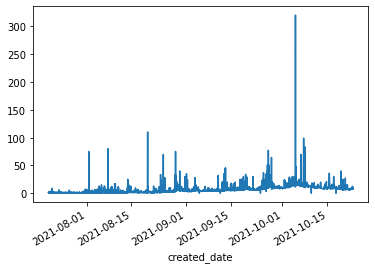

In [35]:
cool_cats_df['total_price_eth'].plot()

We can see that there are certainly days with high spikes of sales activity, and overall what seems like cyclical sale spikes. My first thesis is that besides steady growth of the asset, perhaps there were fluctuations in the prices of Ethereum that caused the 
highs and lows.. 

In [50]:
cool_cats_df.isna().sum().sort_values(ascending=False)[80:109]

asset_bundle.asset_contract.collection.featured_image_url                 10294
asset_bundle.asset_contract.collection.hidden                             10294
asset_bundle.asset_contract.collection.safelist_request_status            10294
asset_bundle.asset_contract.collection.image_url                          10294
asset_bundle.asset_contract.collection.large_image_url                    10294
asset_bundle.asset_contract.collection.created_date                       10294
asset_bundle.asset_contract.collection.banner_image_url                   10294
asset_bundle.asset_contract.collection.medium_username                    10294
asset_bundle.asset_contract.collection.name                               10294
asset_bundle.asset_contract.collection.only_proxied_transfers             10294
asset_bundle.asset_contract.collection.opensea_buyer_fee_basis_points     10294
asset_bundle.asset_contract.collection.opensea_seller_fee_basis_points    10294
asset_bundle.asset_contract.collection.p

In [55]:
null_columns = cool_cats_df.isna().sum().sort_values(ascending=False)[:109].index

For data visualization purposes, I am going to remove all columns with mostly nulls, since there are many.

In [56]:
drop_list = []
for i in null_columns:
    drop_list.append(i)

In [57]:
cool_cats_df = cool_cats_df.drop(drop_list, axis=1)

In [58]:
cool_cats_df

,collection_slug,contract_address,created_date,event_type,id,is_private,quantity,total_price,asset.id,asset.token_id,...,transaction.to_account.profile_img_url,transaction.to_account.address,transaction.to_account.config,transaction.transaction_hash,transaction.transaction_index,winner_account.user.username,winner_account.profile_img_url,winner_account.address,winner_account.config,total_price_eth
created_date,,,,,,,,,,,,,,,,,,,,,
2021-07-20 04:00:16.046520,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-07-20 04:00:16.046520,successful,314979233,False,1,9.800000e+17,30236794.0,4668,...,https://storage.googleapis.com/opensea-static/...,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,verified,0xb7623e32ee90af7202bfabba05b006f1e997840ee031...,160,Woundwort,https://storage.googleapis.com/opensea-static/...,0xb47b29cda606cf7e7ed3672c8131eb8124ba3934,,0.980
2021-07-20 04:03:27.737959,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-07-20 04:03:27.737959,successful,314988856,False,1,9.290000e+17,30242595.0,6744,...,https://storage.googleapis.com/opensea-static/...,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,verified,0x8fd25c0aba4ba0c4fea3de1d19fa1d598ad7c619280e...,79,JaimeMusings,https://storage.googleapis.com/opensea-static/...,0x44167790aa6c787fffee17aba51bf55b46c38d06,,0.929
2021-07-20 04:12:51.292764,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-07-20 04:12:51.292764,successful,315014075,False,1,9.900000e+17,30234313.0,3856,...,https://storage.googleapis.com/opensea-static/...,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,verified,0xc35e6807b867b2f060d99de85662c41f760712412275...,94,0x70a,https://storage.googleapis.com/opensea-static/...,0xf70a16287894d64d380458be2754d9c1f8296bf6,,0.990
2021-07-20 04:13:29.909525,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-07-20 04:13:29.909525,successful,315015896,False,1,9.000000e+17,30246238.0,8611,...,https://storage.googleapis.com/opensea-static/...,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,verified,0x8987265089f680cd0ec4ab1803a6ac592eeadacd13f8...,161,SlowCowboy2,https://storage.googleapis.com/opensea-static/...,0x7cc220c499162856eceeba2b1c33277455a3cfb7,,0.900
2021-07-20 04:15:36.898508,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-07-20 04:15:36.898508,successful,315021013,None,1,8.600000e+17,30229327.0,3004,...,https://storage.googleapis.com/opensea-static/...,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,verified,0xd8542f5f5d08ce23b300c52c0fca2a16c57059297233...,259,CoolCatRescue,https://storage.googleapis.com/opensea-static/...,0xa1cbb86803090bb85a45321d4eb9848ab755363a,,0.860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22 21:42:21.243043,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-10-22 21:42:21.243043,successful,1497441142,False,1,8.000000e+18,30244830.0,7790,...,https://storage.googleapis.com/opensea-static/...,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,verified,0x8a4557fcf5308a2ce403b79196171d18ef84ea123a53...,356,grantoe,https://storage.googleapis.com/opensea-static/...,0xab0bfcafa3d6ec73344f195e98695965cd55f9ad,,8.000
2021-10-22 21:58:06.614580,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-10-22 21:58:06.614580,successful,1497656848,False,1,8.500000e+18,30244561.0,7698,...,https://storage.googleapis.com/opensea-static/...,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,verified,0xd88488c02ca72495c0388b946f4fc7cd70799ebca4c5...,167,None,https://storage.googleapis.com/opensea-static/...,0xce899baf2bec0a66222dc7389614e711e9858580,,8.500
2021-10-22 22:09:51.133094,cool-cats-nft,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-10-22 22:09:51.133094,successful,1497817034,False,1,9.600000e+18,30243627.0,7227,...,https://storage.googleapis.com/opensea-static/...,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,verified,0x18959227670c9d91f3f59d1fd6cc3a13c5ac8675f63c...,94,ABCDEFGHIJKLMNOPQRSTUVWXYZ,https://storage.googleapis.com/opensea-static/...,0

There are still plenty of columns that contain the same value in each row, and for that reason are useless. I am going to create a new data frame keeping just the columns that contain different values in them, and use that as our final DF to save on the machine.

In [59]:
df_columns_keep = ["id", "quantity", "total_price_eth", "asset.id", "asset.token_id", "asset.num_sales", 
                   "asset.name", "seller.address", "transaction.block_hash", "transaction.block_number",
                  "transaction.id", "transaction.timestamp", "transaction.transaction_hash", "transaction.transaction_index",
                  "winner_account.address"]

In [60]:
cool_cats_final = cool_cats_df[df_columns_keep]

In [61]:
cool_cats_final

,id,quantity,total_price_eth,asset.id,asset.token_id,asset.num_sales,asset.name,seller.address,transaction.block_hash,transaction.block_number,transaction.id,transaction.timestamp,transaction.transaction_hash,transaction.transaction_index,winner_account.address
created_date,,,,,,,,,,,,,,,
2021-07-20 04:00:16.046520,314979233,1,0.980,30236794.0,4668,6.0,Cool Cat #4668,0x08d816526bdc9d077dd685bd9fa49f58a5ab8e48,0x02c12f756584029777951ee8bd680d166c13748109c6...,12861162,138163984,2021-07-20T03:59:42,0xb7623e32ee90af7202bfabba05b006f1e997840ee031...,160,0xb47b29cda606cf7e7ed3672c8131eb8124ba3934
2021-07-20 04:03:27.737959,314988856,1,0.929,30242595.0,6744,1.0,Cool Cat #6744,0xb2a2a6a69e7a0ad66943f4c2869d45a9919cf740,0xf034b381780b69e8e40491a9ede4122db29b33a6a4bd...,12861173,138164672,2021-07-20T04:03:07,0x8fd25c0aba4ba0c4fea3de1d19fa1d598ad7c619280e...,79,0x44167790aa6c787fffee17aba51bf55b46c38d06
2021-07-20 04:12:51.292764,315014075,1,0.990,30234313.0,3856,6.0,Cool Cat #3856,0x8c2e56d181465f69c419dcd8760f2ade6372cc8b,0xbf906cf47b266eb984d35e28f251de696b9478cd576f...,12861209,138166889,2021-07-20T04:12:22,0xc35e6807b867b2f060d99de85662c41f760712412275...,94,0xf70a16287894d64d380458be2754d9c1f8296bf6
2021-07-20 04:13:29.909525,315015896,1,0.900,30246238.0,8611,3.0,Cool Cat #8611,0xb697b9455eeee9574ec5c5350cb10c8a5b752a39,0x681b0674b057e132a1ad8d8ee683e3fb349752b8f688...,12861213,138167162,2021-07-20T04:13:05,0x8987265089f680cd0ec4ab1803a6ac592eeadacd13f8...,161,0x7cc220c499162856eceeba2b1c33277455a3cfb7
2021-07-20 04:15:36.898508,315021013,1,0.860,30229327.0,3004,4.0,Cool Cat #3004,0x6e63a4caeccb4f341ee9c9175c9cc554bdb6d10b,0xa4c290e58186a8edabf1b03a77310f1c337241a6883d...,12861219,138167576,2021-07-20T04:14:54,0xd8542f5f5d08ce23b300c52c0fca2a16c57059297233...,259,0xa1cbb86803090bb85a45321d4eb9848ab755363a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22 21:42:21.243043,1497441142,1,8.000,30244830.0,7790,2.0,Cool Cat #7790,0x3f304c6721f35ff9af00fd32650c8e0a982180ab,0x384b371f0d5bdc524a6c922892eed8676503e67e5ee2...,13469899,186282723,2021-10-22T21:41:44,0x8a4557fcf5308a2ce403b79196171d18ef84ea123a53...,356,0xab0bfcafa3d6ec73344f195e98695965cd55f9ad
2021-10-22 21:58:06.614580,1497656848,1,8.500,30244561.0,7698,6.0,Cool Cat #7698,0x83b70d7cb2c902f15cc8b38b7aac3e3831d489fc,0xbe76cb44a080bdde48fd4f55ba7451a21809de0647e8...,13469968,186289421,2021-10-22T21:57:36,0xd88488c02ca72495c0388b946f4fc7cd70799ebca4c5...,167,0xce899baf2bec0a66222dc7389614e711e9858580
2021-10-22 22:09:51.133094,1497817034,1,9.600,30243627.0,7227,3.0,Cool Cat #7227,0x3fb9bdda993aafca06a054231f14be520786a69a,0x5eca2a47427d0b9c9d5cec68fd000fc6569bf4e392c8...,13470006,186293565,2021-10-22T22:07:24,0x18959227670c9d91f3f59d1fd6cc3a13c5ac8675f63c...,94,0x38a4d889a1979133fbc1d58f970f0953e3715c26


Look at that clean data! Now I am going to save it to a CSV.

In [63]:
cool_cats_final.to_csv("coolcats_data.csv")

Now that I have created a process to extract the proper data from an Opensea collection, prepare and clean it for modeling, I can repeat this process for other collections in this notebook as well.